# Purpose
Predict total sales for every product and store in the next month

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Data import

In [2]:
feather_filepath = 'C:/Users/nowic/Desktop/home_tasks/pets/future_sales/feather_data/'

## sales_train

In [3]:
sales_train = pd.read_feather(f'{feather_filepath}sales_train.feather')
sales_train.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1593594,02.04.2014,15,12,17818,149.0,1.0
760565,31.08.2013,7,50,19723,98.0,1.0
567647,09.06.2013,5,16,14743,98.0,1.0
2080513,04.10.2014,21,49,10512,999.0,1.0
928096,05.09.2013,8,54,3676,899.0,1.0
391428,06.04.2013,3,54,1411,159.0,1.0
1362528,02.01.2014,12,25,2073,1349.5,1.0
1185903,12.12.2013,11,22,4688,1499.0,1.0
1084272,27.11.2013,10,17,1502,2599.0,1.0
367648,01.04.2013,3,4,6121,599.0,1.0


In [4]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000000,1.0
1,03.01.2013,0,25,2552,899.000000,1.0
2,05.01.2013,0,25,2552,899.000000,-1.0
3,06.01.2013,0,25,2554,1709.050049,1.0
4,15.01.2013,0,25,2555,1099.000000,1.0
5,10.01.2013,0,25,2564,349.000000,1.0
6,02.01.2013,0,25,2565,549.000000,1.0
7,04.01.2013,0,25,2572,239.000000,1.0
8,11.01.2013,0,25,2572,299.000000,1.0
9,03.01.2013,0,25,2573,299.000000,3.0


## items

In [5]:
items = pd.read_feather(f'{feather_filepath}items.feather')
items.sample(10)

,item_name,item_id,item_category_id
21239,Футболка The Elder Scrolls Online Breton L,21239,61
5800,Planet mp3. Rock Collection (mp3-CD) (jewel),5800,57
7640,WARHAMMER MINIATURES: Stormcast Eternals Palad...,7640,64
20915,Фигурка Малефисента Малефисента,20915,72
16649,ОСТРОВ ПРОКЛЯТЫХ э (BD),16649,37
4279,"L.A. Noire [PC, Цифровая версия]",4279,31
12059,ИСТОРИЯ ДЕЛЬФИНА 2,12059,40
10498,ГРАВИТАЦИЯ (3D BD+BD),10498,38
10524,ГРИБЫ (3D BD),10524,38
1461,Army of Two: The Devil’s Cartel. Overkill Edit...,1461,19


In [6]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


## item_categories

In [7]:
item_categories = pd.read_feather(f'{feather_filepath}item_categories.feather')
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [8]:
item_categories.sample(10)

,item_category_name,item_category_id
32,"Карты оплаты (Кино, Музыка, Игры)",32
62,"Подарки - Гаджеты, роботы, спорт",62
53,Книги - Художественная литература,53
19,Игры - PS3,19
49,Книги - Методические материалы 1С,49
47,"Книги - Комиксы, манга",47
46,Книги - Бизнес литература,46
77,Программы - Обучающие,77
34,Карты оплаты - Live! (Цифра),34
22,Игры - PSVita,22


In [9]:
item_categories.tail(10)

,item_category_name,item_category_id
74,Программы - MAC (Цифра),74
75,Программы - Для дома и офиса,75
76,Программы - Для дома и офиса (Цифра),76
77,Программы - Обучающие,77
78,Программы - Обучающие (Цифра),78
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


## shops

In [10]:
shops = pd.read_feather(f'{feather_filepath}shops.feather')
shops.sample(10)

,shop_name,shop_id
29,"Москва ТЦ ""Новый век"" (Новокосино)",29
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
58,"Якутск ТЦ ""Центральный""",58
38,"Омск ТЦ ""Мега""",38
0,"!Якутск Орджоникидзе, 56 фран",0
10,Жуковский ул. Чкалова 39м?,10
46,"Сергиев Посад ТЦ ""7Я""",46
31,"Москва ТЦ ""Семеновский""",31
42,"СПб ТК ""Невский Центр""",42
55,Цифровой склад 1С-Онлайн,55


In [11]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


# Joining  to one DataFrame

In [12]:
joined_items = items.join(item_categories.set_index('item_category_id'), on='item_category_id')
joined_items.sample(10)

,item_name,item_id,item_category_id,item_category_name
7968,Xbox LIVE: GOLD подарочная карта 1000 рублей (...,7968,33,Карты оплаты - Live!
21996,"Штрафбат [PC, Jewel, русская версия]",21996,30,Игры PC - Стандартные издания
18275,СБ. XXXL 31 Максимальный,18275,55,Музыка - CD локального производства
17741,Программное обеспечение Клавиатор (DVD-box),17741,75,Программы - Для дома и офиса
1644,"BEATLES, THE Magical Mystery Tour STEREO REMAS...",1644,56,Музыка - CD фирменного производства
4427,LINKIN PARK Recharged,4427,55,Музыка - CD локального производства
6529,Skylanders SuperChargers. Набор из двух фигуро...,6529,25,Игры - Аксессуары для игр
14967,Манга Нахальный принц и кошка-несмеяна Том 1,14967,47,"Книги - Комиксы, манга"
12242,ЙОГА ДЛЯ АКТИВАЦИИ ИММУНИТЕТА И ОЗДОРОВЛЕНИЯ,12242,40,Кино - DVD
19563,ТАНГО ЛИБРЕ. КИНО БЕЗ ГРАНИЦ,19563,40,Кино - DVD


In [13]:
joined_sales = sales_train.join(joined_items.set_index('item_id'), on='item_id')
joined_sales.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
721737,13.07.2013,6,44,11670,149.000000,1.0,ЗВЕЗДНЫЙ ПУТЬ (Регион),40,Кино - DVD
2651517,16.05.2015,28,58,15571,229.000000,1.0,НАУТИЛУС ПОМПИЛИУС Grand Collection Лучшее д...,55,Музыка - CD локального производства
403563,06.04.2013,3,58,18929,149.000000,1.0,СНЕЖНОЕ ШОУ 3D (2 DVD),40,Кино - DVD
1636742,31.05.2014,16,25,14123,1110.949951,1.0,ЛЮДИ ИКС. КОЛЛЕКЦИЯ (1-6) (BD),41,Кино - Коллекционное
486527,06.05.2013,4,54,6300,299.000000,1.0,SLASH Made In Stoke Live 24/7/11 2CD,55,Музыка - CD локального производства
2828698,27.08.2015,31,25,16147,599.000000,1.0,"Настольная игра Манчкин 2 Дикий топор, арт. 1114",64,Подарки - Настольные игры
766765,01.08.2013,7,54,5261,799.000000,1.0,"Need for Speed The Run [PS3, русская версия]",19,Игры - PS3
959589,26.10.2013,9,56,7954,2590.000000,1.0,Xbox 360 Branded Contrllr Xbox 360 EN/FR/DE/IT...,6,Аксессуары - XBOX 360
353840,08.04.2013,3,24,14212,349.000000,1.0,Лучшее детям Приключения (mp3-DVD) (DVD-Box),43,Книги - Аудиокниги
573382,08.06.2013,5,4,19196,399.000000,1.0,СУМЕРКИ. САГА. РАССВЕТ: ЧАСТЬ 2 (2DVD),40,Кино - DVD


## Final frame to investigate

In [14]:
# date - date in format dd/mm/yyyy
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
# item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
# item_name - name of item
# item_category_name - name of item category
# shop_name - name of shop

sales_train_final = joined_sales.join(shops.set_index('shop_id'), on='shop_id')
sales_train_final = sales_train_final.drop(['shop_id', 'item_id', 'item_category_id'], axis=1)
sales_train_final.sample(10)

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
2320084,31.12.2014,23,299.000000,2.0,Настольная игра Оливье,Подарки - Настольные игры (компактные),"Москва ТРК ""Атриум"""
2030204,14.10.2014,21,599.000000,1.0,Настольная игра Имаджинариум Дополнение Одиссея,Подарки - Настольные игры,"Москва ТЦ ""МЕГА Белая Дача II"""
1636143,26.05.2014,16,199.000000,1.0,ГЕРМАН АННА Когда цвели сады,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2120796,17.11.2014,22,549.000000,1.0,ИГРА ПРЕСТОЛОВ. СЕЗОН 1 (5 DVD),Кино - DVD,"Москва ТЦ ""Семеновский"""
159483,06.02.2013,1,326.779999,1.0,Medal of Honor: Warfighter. Limited Edition [P...,Игры PC - Стандартные издания,"Курск ТЦ ""Пушкинский"""
43983,07.01.2013,0,110.000000,1.0,СБ. Песни нашего века 3,Музыка - CD локального производства,"!Якутск Орджоникидзе, 56 фран"
150755,26.02.2013,1,1699.000000,1.0,"Far Cry 3. Коллекционное издание [PC, русская ...",Игры PC - Коллекционные издания,"Коломна ТЦ ""Рио"""
1448747,26.02.2014,13,1199.000000,1.0,"FIFA 13 [Xbox 360, русская версия]",Игры - XBOX 360,"Якутск Орджоникидзе, 56"
2688976,03.06.2015,29,299.000000,1.0,ИГРОК,Кино - DVD,"Курск ТЦ ""Пушкинский"""
1995392,24.09.2014,20,99.000000,1.0,Д' АРТАНЬЯН И ТРИ МУШКЕТЕРА (регион),Кино - DVD,"Москва ТЦ ""Семеновский"""


In [33]:
sales_train_final.sort_values(by='item_cnt_day')

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
1057907,02.11.2013,10,15.000000,-22.0,ZL004 Лазерные наклейки Смайлики маленькие,"Подарки - Открытки, наклейки",Интернет-магазин ЧС
1835454,10.07.2014,18,5.000000,-16.0,Фирменный пакет майка 1С Интерес белый (34*42)...,"Подарки - Сумки, Альбомы, Коврики д/мыши","Казань ТЦ ""ПаркХаус"" II"
2048519,10.10.2014,21,1433.333374,-9.0,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",Билеты (Цифра),Интернет-магазин ЧС
59156,18.01.2013,0,2599.000000,-6.0,"Assassin’s Creed 3. Freedom Edition [PC, русск...",Игры PC - Коллекционные издания,Интернет-магазин ЧС
940092,19.10.2013,9,2599.000000,-6.0,"Grand Theft Auto V [PS3, русские субтитры]",Игры - PS3,"СПб ТК ""Невский Центр"""
...,...,...,...,...,...,...,...
2608040,14.04.2015,27,1904.548096,624.0,"Grand Theft Auto V [PC, русские субтитры]",Игры PC - Стандартные издания,Интернет-магазин ЧС
2851091,30.09.2015,32,1702.825806,637.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",Билеты (Цифра),Цифровой склад 1С-Онлайн
2864235,30.09.2015,32,1692.526123,669.0,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",Служебные - Билеты,Интернет-магазин ЧС
2326930,15.01.2015,24,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,"Подарки - Сумки, Альбомы, Коврики д/мыши",Интернет-магазин ЧС


# EDA

## Describe

In [15]:
sales_train_final.describe()

,date_block_num,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,8.906234e+02,1.242641e+00
std,9.422988e+00,1.726440e+03,2.612213e+00
min,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.990000e+02,1.000000e+00
75%,2.300000e+01,9.990000e+02,1.000000e+00
max,3.300000e+01,3.079800e+05,2.169000e+03


## Item sales count

In [35]:
item_sales_count = sales_train_final.groupby('item_cnt_day', as_index=False)\
    .agg({'item_name': 'count'})\
    .rename(columns={'item_name': 'sales_stats'})
item_sales_count.head(10)

,item_cnt_day,sales_stats
0,-22.0,1
1,-16.0,1
2,-9.0,1
3,-6.0,2
4,-5.0,4
5,-4.0,3
6,-3.0,14
7,-2.0,78
8,-1.0,7252
9,1.0,2629372


## Shops

### Item counts per shop

In [17]:
items_count_per_shop = sales_train_final.groupby(['shop_name'], as_index=False) \
    .agg({'item_name': 'count'}) \
    .rename(columns={'item_name': 'items_count'})
items_count_per_shop.head(10)

,shop_name,items_count
0,"!Якутск Орджоникидзе, 56 фран",9857
1,"!Якутск ТЦ ""Центральный"" фран",5678
2,"Адыгея ТЦ ""Мега""",25991
3,"Балашиха ТРК ""Октябрь-Киномир""",25532
4,"Волжский ТЦ ""Волга Молл""",38242
5,"Вологда ТРЦ ""Мармелад""",38179
6,"Воронеж (Плехановская, 13)",82663
7,"Воронеж ТРЦ ""Максимир""",58076
8,"Воронеж ТРЦ Сити-Парк ""Град""",3412
9,Выездная Торговля,3751


In [18]:
sales_train_final['shop_name'].replace(
    to_replace=['Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²'],
    value = 'Жуковский ул. Чкалова',
    inplace=True
)

items_count_per_shop = sales_train_final.groupby(['shop_name'], as_index=False) \
    .agg({'item_name': 'count'}) \
    .rename(columns={'item_name': 'items_count'})
items_count_per_shop.head(10)

,shop_name,items_count
0,"!Якутск Орджоникидзе, 56 фран",9857
1,"!Якутск ТЦ ""Центральный"" фран",5678
2,"Адыгея ТЦ ""Мега""",25991
3,"Балашиха ТРК ""Октябрь-Киномир""",25532
4,"Волжский ТЦ ""Волга Молл""",38242
5,"Вологда ТРЦ ""Мармелад""",38179
6,"Воронеж (Плехановская, 13)",82663
7,"Воронеж ТРЦ ""Максимир""",58076
8,"Воронеж ТРЦ Сити-Парк ""Град""",3412
9,Выездная Торговля,3751


### Barplots
Items count per shop

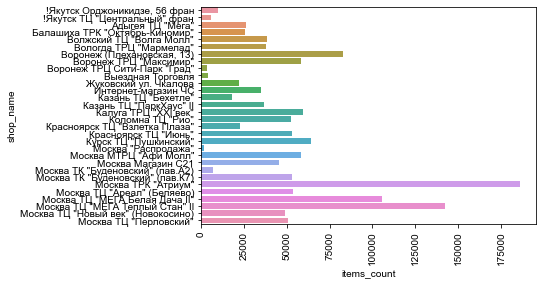

In [19]:
icps_barplot_half1 = sns.barplot(x='items_count', y='shop_name', data=items_count_per_shop[:30])
sns.set(rc={'figure.figsize': (10, 10)})
icps_barplot_half1.xaxis.set_tick_params(rotation=90)

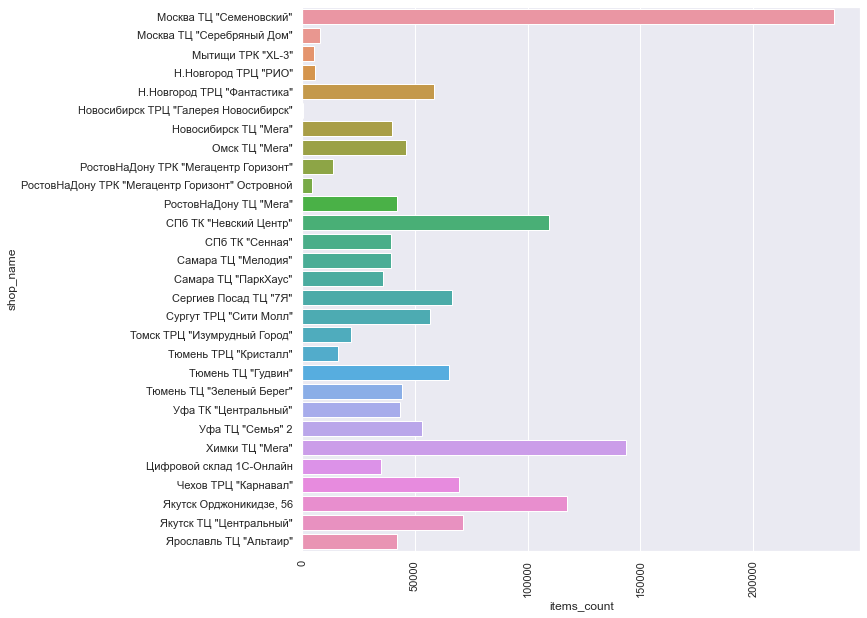

In [20]:
icps_barplot_half2 = sns.barplot(x='items_count', y='shop_name', data=items_count_per_shop[30:])
sns.set(rc={'figure.figsize': (10, 10)})
icps_barplot_half2.xaxis.set_tick_params(rotation=90)

### Top-10 lowest sales per shop

In [21]:
items_count_per_shop.sort_values('items_count').head(10)

,shop_name,items_count
35,"Новосибирск ТРЦ ""Галерея Новосибирск""",306
19,"Москва ""Распродажа""",1792
8,"Воронеж ТРЦ Сити-Парк ""Град""",3412
9,Выездная Торговля,3751
39,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",4257
32,"Мытищи ТРК ""XL-3""",5027
1,"!Якутск ТЦ ""Центральный"" фран",5678
33,"Н.Новгород ТРЦ ""РИО""",5752
22,"Москва ТК ""Буденовский"" (пав.А2)",6963
31,"Москва ТЦ ""Серебряный Дом""",7947


## Categories

### Uniques

In [22]:
sales_train_final['item_category_name'].unique()

array(['Кино - Blu-Ray', 'Музыка - Винил',
       'Музыка - CD фирменного производства',
       'Музыка - Музыкальное видео',
       'Музыка - CD локального производства', 'Игры - XBOX 360',
       'Игры - PS3', 'Игры PC - Дополнительные издания',
       'Игры PC - Стандартные издания', 'Игры - PSP', 'Кино - DVD',
       'Программы - Для дома и офиса',
       'Книги - Методические материалы 1С',
       'Игры PC - Коллекционные издания', 'Игры - PSVita',
       'Подарки - Развитие', 'Программы - 1С:Предприятие 8',
       'Программы - Обучающие', 'Музыка - MP3',
       'Музыка - Подарочные издания', 'Аксессуары - PSP',
       'Подарки - Гаджеты, роботы, спорт', 'Книги - Аудиокниги',
       'Игровые консоли - XBOX 360', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSVita',
       'Подарки - Сертификаты, услуги', 'Карты оплаты - PSN',
       'Карты оплаты - Live!', 'Аксессуары - XBOX 360',
       'Кино - Blu-Ray 3D', 'Игры - Аксессуары для игр',
       'Игровые консоли - PS

### Sales count per date block

In [23]:
sales_count_date = sales_train_final.groupby('date_block_num', as_index=False)\
    .agg({'item_cnt_day': 'count'})\
    .rename(columns={'item_cnt_day': 'item_cnt_block'})
sales_count_date.sample(10)

,date_block_num,item_cnt_block
15,15,77906
24,24,88522
26,26,69977
12,12,99349
27,27,56274
18,18,78760
29,29,54617
25,25,71808
7,7,104772
20,20,73157


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_block'>

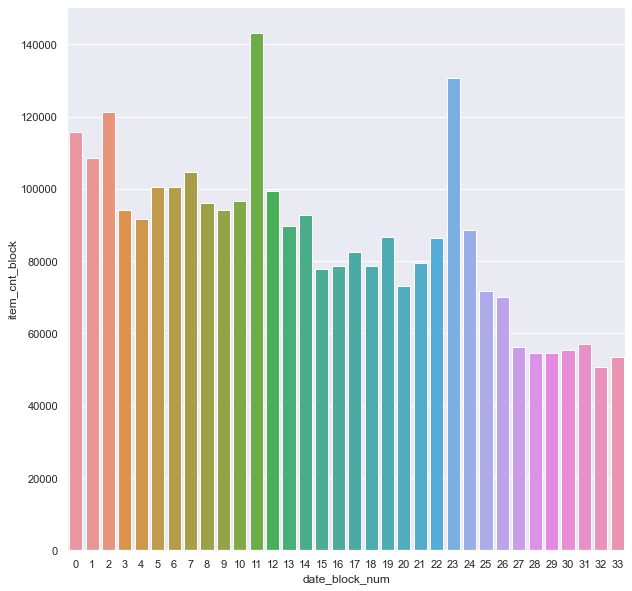

In [24]:
scd_barplot = sns.barplot(x='date_block_num', y='item_cnt_block', data=sales_count_date)
scd_barplot

### Sales count per category and date block

In [25]:
sales_count_category_date = sales_train_final.groupby(['item_category_name', 'date_block_num'], as_index=False)\
    .agg({'item_cnt_day': 'count'})\
    .rename(columns={'item_cnt_day': 'item_cnt_date_block'})
sales_count_category_date.head(10)

,item_category_name,date_block_num,item_cnt_date_block
0,PC - Гарнитуры/Наушники,0,1
1,PC - Гарнитуры/Наушники,1,1
2,PC - Гарнитуры/Наушники,3,1
3,Аксессуары - PS2,0,1
4,Аксессуары - PS2,1,1
5,Аксессуары - PS3,0,1263
6,Аксессуары - PS3,1,1114
7,Аксессуары - PS3,2,974
8,Аксессуары - PS3,3,630
9,Аксессуары - PS3,4,573


In [26]:
category_block_count = sales_count_category_date.groupby('item_category_name')\
    .agg({'date_block_num': 'count'})\
    .rename(columns={'date_block_num': 'block_count'})
category_block_count.sort_values('block_count').head(10)

,block_count
item_category_name,
Книги - Путеводители,1
Книги - Познавательная литература,1
Книги - Открытки,1
Игровые консоли - PS2,1
Аксессуары - PS2,2
PC - Гарнитуры/Наушники,3
Книги - Художественная литература,3
Карты оплаты - Windows (Цифра),3
Книги - Компьютерная литература,4


## Category unions

In [27]:
sales_train_final

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
0,02.01.2013,0,999.000000,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,899.000000,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,899.000000,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,1709.050049,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,1099.000000,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,299.000000,1.0,V/A Nu Jazz Selection (digipack),Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,299.000000,1.0,V/A The Golden Jazz Collection 1 2CD,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,349.000000,1.0,V/A The Best Of The 3 Tenors,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,299.000000,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),Музыка - MP3,"Москва ТРК ""Атриум"""


In [28]:
sales_train_final[sales_train_final['item_category_name'].str.startswith('Книги')]

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
228,21.01.2013,0,399.000000,1.0,CRM: Практика эффективного бизнеса (2 издание),Книги - Методические материалы 1С,"Москва ТРК ""Атриум"""
616,22.01.2013,0,349.000000,1.0,1С:Предпр.8. Управление торг.операциями в вопр...,Книги - Методические материалы 1С,"Москва ТРК ""Атриум"""
617,23.01.2013,0,349.000000,1.0,1С:Предпр.8. Управление торг.операциями в вопр...,Книги - Методические материалы 1С,"Москва ТРК ""Атриум"""
624,30.01.2013,0,240.000000,1.0,1С:Предприятие 8.2. Практическое пособие разра...,Книги - Методические материалы 1С,"Москва ТРК ""Атриум"""
627,10.01.2013,0,299.000000,1.0,1С:Управление небольшой фирмой 8. Самоучитель....,Книги - Методические материалы 1С,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935696,21.10.2015,33,279.200012,1.0,Акунин Борис Коронация (mp3-CD) (digipack),Книги - Аудиокниги,"Москва ТРК ""Атриум"""
2935697,29.10.2015,33,349.000000,1.0,Акунин Борис Огненный перст (mp3-CD) (digipack),Книги - Аудиокниги,"Москва ТРК ""Атриум"""
2935699,21.10.2015,33,349.000000,1.0,Акунин Борис Сборник Планета Вода 2CD (mp3-C...,Книги - Аудиокниги,"Москва ТРК ""Атриум"""
2935711,29.10.2015,33,349.000000,1.0,Акунин Борис Сборник Планета Вода 2CD (mp3-C...,Книги - Аудиокниги,"Москва ТРК ""Атриум"""


In [29]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [30]:
item_categories_added = pd.read_feather(f'{feather_filepath}item_categories.feather')

item_categories_added.at[32, 'item_category_name'] = 'Карты оплаты - Кино, музыка, игры'
item_categories_added.at[26, 'item_category_name'] = 'Игры - Android'
item_categories_added.at[27, 'item_category_name'] = 'Игры - MAC'
item_categories_added.at[79, 'item_category_name'] = 'Служебные -'
item_categories_added.at[81, 'item_category_name'] = 'Чистые носители - шпиль'
item_categories_added.at[82, 'item_category_name'] = 'Чистые носители - штучные'
item_categories_added

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные -,79
80,Служебные - Билеты,80
81,Чистые носители - шпиль,81
82,Чистые носители - штучные,82


In [31]:
item_categories_added['item_category_class'] = None
for item in item_categories_added['item_category_name']:
    if '-' in item:
        category_class = item[:item.index('-')]
        item_categories_added.at[
            item_categories_added.index[
                item_categories_added['item_category_name'] == item][0],
                'item_category_class'] = category_class
    else:
        item_categories_added.at[
            item_categories_added.index[
                item_categories_added['item_category_name'] == item][0],
                'item_category_class'] = 'Другое'
item_categories_added

,item_category_name,item_category_id,item_category_class
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
...,...,...,...
79,Служебные -,79,Служебные
80,Служебные - Билеты,80,Служебные
81,Чистые носители - шпиль,81,Чистые носители
82,Чистые носители - штучные,82,Чистые носители
